# Объявления о продаже Toyota Auris (2013 - 2020 года выпуска). 

## Данные с сайта nettiauto.com на основе 2479 объявлений

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set options
pd.set_option("max_colwidth", 100)

# library & dataset
import seaborn as sns

## 1. Просмотр датасета

In [2]:
df = pd.read_csv('auris_fi.csv')

In [3]:
df.head(3)

,Make & model|Year|Mileage|Price|Sold date,Year,Mileage,Price,Sold date
0,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid ActiveEdtion|2019|23 000|23 850 €|06-2021",2019,23 000,23 850 €,06-2021
1,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid Active Edition|2019|37 000|22 980 €|08-2021",2019,37 000,22 980 €,08-2021
2,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid Active Edition|2019|44 000|22 980 €|08-2021",2019,44 000,22 980 €,08-2021


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Make & model|Year|Mileage|Price|Sold date  2479 non-null   object
 1   Year                                       2479 non-null   object
 2   Mileage                                    2479 non-null   object
 3   Price                                      2479 non-null   object
 4   Sold date                                  2479 non-null   object
dtypes: object(5)
memory usage: 97.0+ KB


## 2. Чистка датасета

In [5]:
# переименуем столбцы
df = df.rename(columns = {'Sold date': 'Sold_date'})
df = df.rename(columns = {'Make & model|Year|Mileage|Price|Sold date': 'model_description'})

# удалим пробелы
df['Mileage'] = df['Mileage'].str.replace(" ", "")
df['Price'] = df['Price'].str.replace(" ", "")

In [6]:
# удалим лишнее Vuosi
df = df.drop(df.query('Year == "Vuosi"').index.values.tolist())

# удалим данные где дата продажи 0
drop_nulls = df.query('Sold_date == "00-0000"').index.values.tolist()
df = df.drop(drop_nulls)

In [7]:
# приведем к формату времени
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
# приведем к формату времени
df['Sold_date'] = pd.to_datetime(df['Sold_date'], format='%m-%Y')

In [8]:
# удалим данные где мили Eiilmoitettu
drop_next = df[df['Mileage'] == 'Eiilmoitettu'].index.values.tolist()
for i in drop_next:
    df = df.drop(index = i)

In [9]:
# удалим данные где мили Eihin
drop_a = df[df['Price'] == 'Eihin'].index.values.tolist()
drop_a

[]

In [10]:
df = df.drop(index = 1977)
df = df.drop(index = 2076)

In [11]:
# мили целочисленные значения
df['Mileage'] = df['Mileage'].astype('float64') 

In [12]:
# цена 5 знаков
df['Price'] = df['Price'].str[:5]
# удалим пробелы
df['Price'] = df['Price'].str.replace("€", "")
# сделаем цену целочисленным значением
df['Price'] = df['Price'].astype(int) 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2447 entries, 0 to 2478
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   model_description  2447 non-null   object        
 1   Year               2447 non-null   datetime64[ns]
 2   Mileage            2447 non-null   float64       
 3   Price              2447 non-null   int64         
 4   Sold_date          2447 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 114.7+ KB


In [14]:
df.head(3)

,model_description,Year,Mileage,Price,Sold_date
0,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid ActiveEdtion|2019|23 000|23 850 €|06-2021",2019-01-01,23000.0,23850,2021-06-01
1,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid Active Edition|2019|37 000|22 980 €|08-2021",2019-01-01,37000.0,22980,2021-08-01
2,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid Active Edition|2019|44 000|22 980 €|08-2021",2019-01-01,44000.0,22980,2021-08-01


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2447 entries, 0 to 2478
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   model_description  2447 non-null   object        
 1   Year               2447 non-null   datetime64[ns]
 2   Mileage            2447 non-null   float64       
 3   Price              2447 non-null   int64         
 4   Sold_date          2447 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 114.7+ KB


In [16]:
df['Age'] = (df['Sold_date'] - df['Year']) / np.timedelta64(1, 'Y')
df.head(3)

,model_description,Year,Mileage,Price,Sold_date,Age
0,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid ActiveEdtion|2019|23 000|23 850 €|06-2021",2019-01-01,23000.0,23850,2021-06-01,2.414834
1,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid Active Edition|2019|37 000|22 980 €|08-2021",2019-01-01,37000.0,22980,2021-08-01,2.581846
2,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid Active Edition|2019|44 000|22 980 €|08-2021",2019-01-01,44000.0,22980,2021-08-01,2.581846


In [17]:
df.describe()

,Mileage,Price,Age
count,2.447000e+03,2447.000000,2447.000000
mean,8.725119e+04,17307.464242,5.565394
std,5.485688e+04,3243.588223,1.883622
min,3.000000e+03,6700.000000,0.495561
25%,5.027150e+04,14980.000000,3.748195
50%,7.800000e+04,16990.000000,5.497717
75%,1.140000e+05,19720.000000,7.414252
max,1.310000e+06,25900.000000,8.832488


In [18]:
# дропнем аномалию
max = df['Mileage'].max()
drop_max = df.query('Mileage == 1310000').index.values.tolist()
df = df.drop(drop_max)
df.head(3)

,model_description,Year,Mileage,Price,Sold_date,Age
0,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid ActiveEdtion|2019|23 000|23 850 €|06-2021",2019-01-01,23000.0,23850,2021-06-01,2.414834
1,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid Active Edition|2019|37 000|22 980 €|08-2021",2019-01-01,37000.0,22980,2021-08-01,2.581846
2,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid Active Edition|2019|44 000|22 980 €|08-2021",2019-01-01,44000.0,22980,2021-08-01,2.581846


In [19]:
# сделаем градацию по пробегу 

def mileage(col):
    if col < 20000:
        return "< 20000"
    elif 20000 <= col < 50000 :
        return "20000 - 49999"
    elif 50000 <= col < 79999 :
        return "50000 - 79999"
    elif 80000 <= col < 100000 :
        return "80000 - 99999"
    else:
        return ">= 100000"

# произведем замену значений в DF
df['mileage_range'] = df['Mileage'].apply(mileage)

In [20]:
# сделаем градацию по пробегу 

def ages_range(col):
    if col < 3:
        return "< 3"
    elif 3 <= col < 5 :
        return "3 - 4"
    elif 5 <= col < 8 :
        return "5 - 7"
    else:
        return ">= 8"

# произведем замену значений в DF
df['age_range'] = df['Age'].apply(ages_range)

#### смотрим двигатели

In [21]:
# посмотрим на мотор
df['engine'] = df['model_description'].str.extract(r'(\d.\d)')
df.head(3)

,model_description,Year,Mileage,Price,Sold_date,Age,mileage_range,age_range,engine
0,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid ActiveEdtion|2019|23 000|23 850 €|06-2021",2019-01-01,23000.0,23850,2021-06-01,2.414834,20000 - 49999,< 3,1.8
1,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid Active Edition|2019|37 000|22 980 €|08-2021",2019-01-01,37000.0,22980,2021-08-01,2.581846,20000 - 49999,< 3,1.8
2,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid Active Edition|2019|44 000|22 980 €|08-2021",2019-01-01,44000.0,22980,2021-08-01,2.581846,20000 - 49999,< 3,1.8


In [22]:
df['engine'].unique()

array(['1.8', '1.2', '1.3', '1.6', '1.4', '2,0', '201', '0,9'],
      dtype=object)

In [23]:
# выбросы "201=(2.0)", "2,0=(2.0)", "0,9=(2.0)"
df.query('engine == "201"')

,model_description,Year,Mileage,Price,Sold_date,Age,mileage_range,age_range,engine
1850,Toyota Auris (2) *HYVÄT VARUSTEET*WEBASTO* Myös vaihto/rahoitus|2014|158 000|12 450 €|07-2021,2014-01-01,158000.0,12450,2021-07-01,7.496389,>= 100000,5 - 7,201
2187,Toyota Auris (2)|2013|148 000|9 900 €|07-2021,2013-01-01,148000.0,9900,2021-07-01,8.495725,>= 100000,>= 8,201
2289,Toyota Auris (2)|2013|175 000|8 900 €|09-2021,2013-01-01,175000.0,8900,2021-09-01,8.665476,>= 100000,>= 8,201
2301,Toyota Auris (2)|2013|191 000|8 990 €|08-2021,2013-01-01,191000.0,8990,2021-08-01,8.580601,>= 100000,>= 8,201
2361,Toyota Auris (2) siisti ja hyvin varusteltu|2013|234 000|8 900 €|08-2021,2013-01-01,234000.0,8900,2021-08-01,8.580601,>= 100000,>= 8,201


In [24]:
df.loc[df['engine'] == '201','engine'] = '2.0'
df.loc[df['engine'] == '2,0','engine'] = '2.0'
df.loc[df['engine'] == '0,9','engine'] = '2.0'

## 3. Графики 

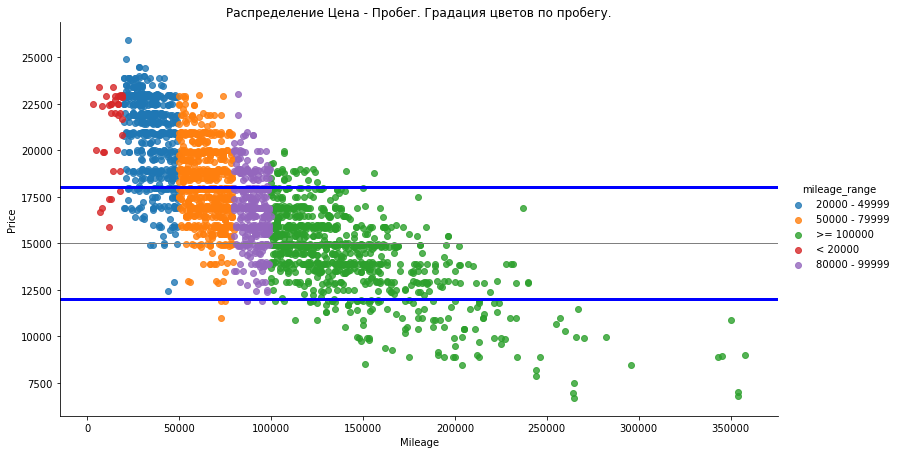

In [25]:
up_limit_budget = 18000
target_limit_budget = 15000
low_limit_budget = 12000
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Mileage", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           hue='mileage_range', 
           legend=True, 
           height=6, 
           aspect=15/8.27);
ax = plt.gca();
ax.set_title("Распределение Цена - Пробег. Градация цветов по пробегу.");
plt.axhline(up_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
plt.axhline(low_limit_budget, linestyle = '-', color ='blue', linewidth = 3);

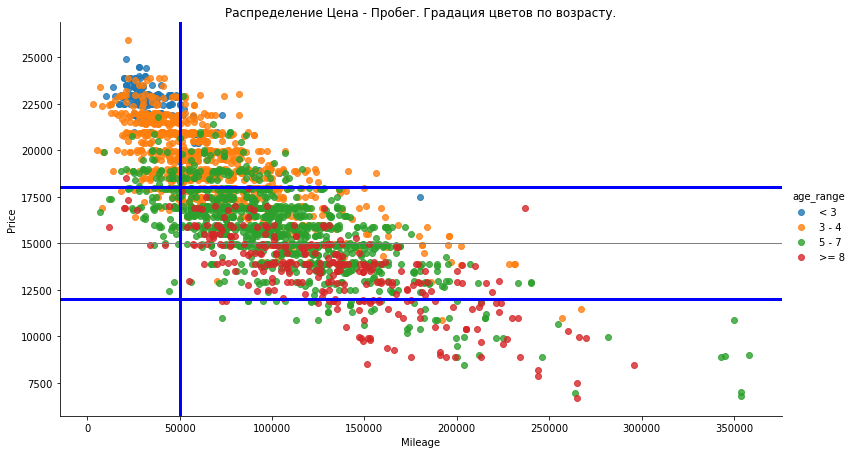

In [26]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Mileage", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           hue='age_range', 
           legend=True, 
           height=6,
           aspect=15/8.27);
ax = plt.gca();
ax.set_title("Распределение Цена - Пробег. Градация цветов по возрасту.");
plt.axhline(up_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
plt.axhline(low_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
plt.axvline(50000, linestyle = '-', color ='blue', linewidth = 3);

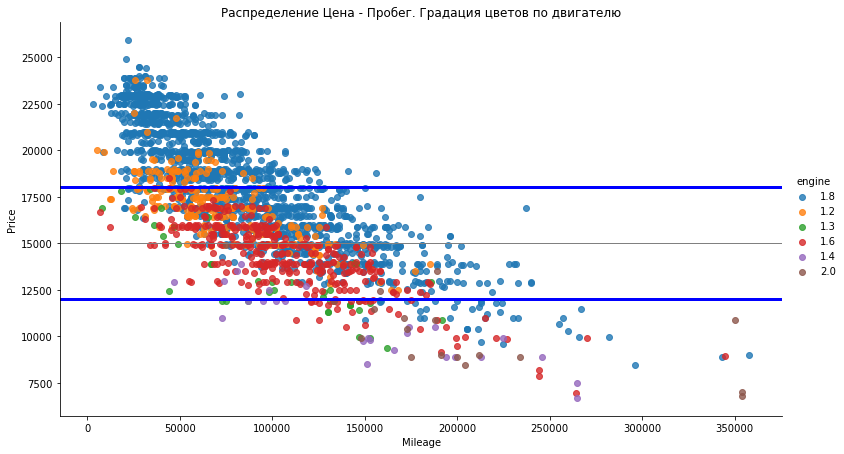

In [27]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Mileage", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           hue='engine', 
           legend=True, 
           height=6,
           aspect=15/8.27);
ax = plt.gca();
ax.set_title("Распределение Цена - Пробег. Градация цветов по двигателю");
plt.axhline(up_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
plt.axhline(low_limit_budget, linestyle = '-', color ='blue', linewidth = 3);

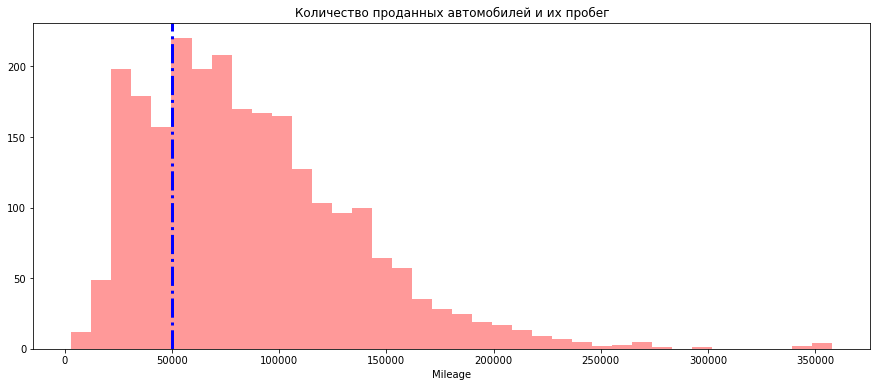

In [28]:
fig, ax = plt.subplots(figsize=(15,6))
sns.distplot( df['Mileage'], 
             hist=True, 
             kde=False, 
             rug=False, 
             color="red" ).set_title('Количество проданных автомобилей и их пробег');
plt.axvline(50000, linestyle = '-.', color ='blue', linewidth = 3);
plt.xlabel("Mileage");

In [29]:
pivot_report = pd.pivot_table(df, 
                              values='Price', 
                              index=['engine'], 
                              aggfunc={'count','median'}).reset_index()
pivot_report

,engine,count,median
0,1.2,252,16900
1,1.3,40,12470
2,1.4,26,10345
3,1.6,367,14690
4,1.8,1743,17990
5,2.0,18,10150


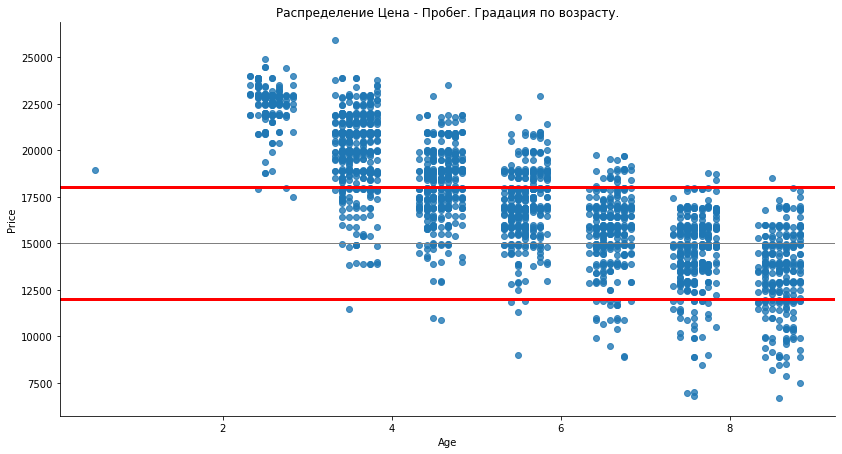

In [30]:
#fig, ax = plt.subplots(figsize=(15,6))
#ax.set_title("Распределение Год - Цена");
#use the function regplot to make a scatterplot
#sns.regplot(x=df["Age"], y=df["Price"]);

sns.lmplot(x="Age", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           legend=False,
           height=6,
           aspect=16/8.27)
ax = plt.gca();
ax.set_title("Распределение Цена - Пробег. Градация по возрасту.");
plt.axhline(up_limit_budget, linestyle = '-', color ='red', linewidth = 3);
plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
plt.axhline(low_limit_budget, linestyle = '-', color ='red', linewidth = 3);

In [31]:
df.corr()

,Mileage,Price,Age
Mileage,1.000000,-0.796310,0.566987
Price,-0.796310,1.000000,-0.799785
Age,0.566987,-0.799785,1.000000


## 4. Выборка из того, что интересно для покупки

In [32]:
int = df[(df['mileage_range'] == '< 20000')|(df['mileage_range'] == '20000 - 49999')]
int.head(3)

,model_description,Year,Mileage,Price,Sold_date,Age,mileage_range,age_range,engine
0,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid ActiveEdtion|2019|23 000|23 850 €|06-2021",2019-01-01,23000.0,23850,2021-06-01,2.414834,20000 - 49999,< 3,1.8
1,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid Active Edition|2019|37 000|22 980 €|08-2021",2019-01-01,37000.0,22980,2021-08-01,2.581846,20000 - 49999,< 3,1.8
2,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid Active Edition|2019|44 000|22 980 €|08-2021",2019-01-01,44000.0,22980,2021-08-01,2.581846,20000 - 49999,< 3,1.8


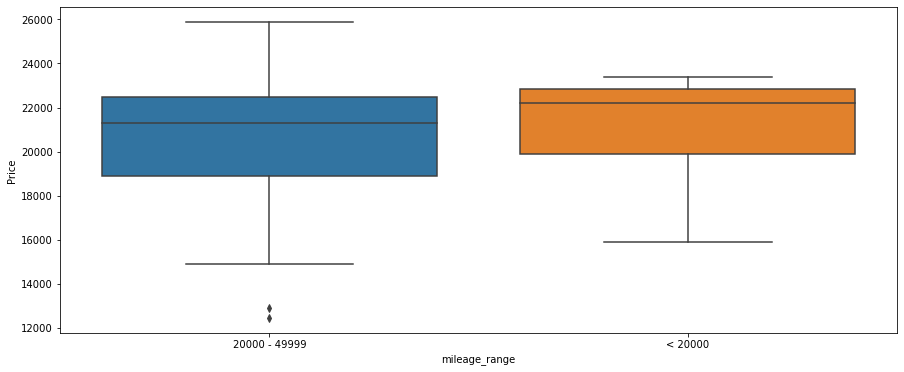

In [33]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot( x=int["mileage_range"], y=int["Price"] );

In [34]:
new = df[df['mileage_range'] == '< 20000']
semi_new = df[df['mileage_range'] == '20000 - 49999']

In [35]:
new_price = new['Price'].median()
new_age = new['Age'].median()
print('медианная цена Auris с пробегом до 20 000 км = {:.2f}, возраст автомобиля = {:.3f}'.format(new_price,new_age))

медианная цена Auris с пробегом до 20 000 км = 22190.00, возраст автомобиля = 3.666


In [36]:
seminew_price = semi_new['Price'].median()
seminew_age = semi_new['Age'].median()
print('медианная цена Auris с пробегом от 20000 км до 49999 км = {:.2f}, возраст автомобиля = {:.3f}'.format(seminew_price,seminew_age))

медианная цена Auris с пробегом от 20000 км до 49999 км = 21290.00, возраст автомобиля = 3.581


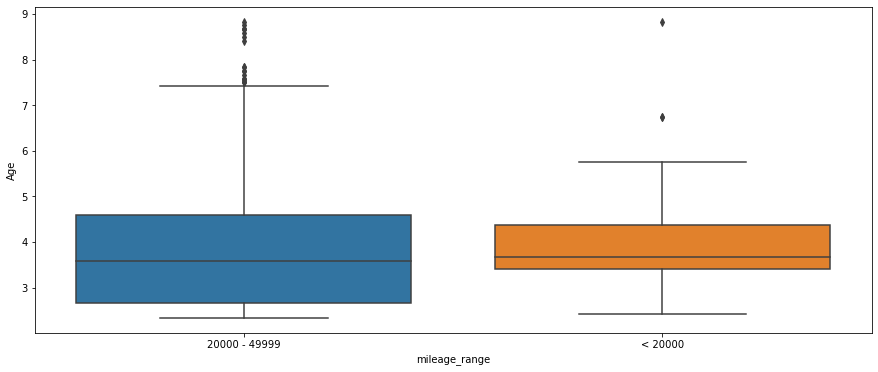

In [37]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot( x=int["mileage_range"], y=int["Age"] );

In [38]:
start_range = semi_new['Price'].quantile(0.25) # 25%
end_range = semi_new['Price'].quantile(0.5) # 50%

In [39]:
print('выгодная цена для toyota auris c пробегом от 20000 км до 49999 км = {:.2f} - {:.2f}'.format(start_range,end_range))

выгодная цена для toyota auris c пробегом от 20000 км до 49999 км = 18900.00 - 21290.00


### Выводы

- медианная цена Auris с пробегом до 20 000 км = 22190.00, возраст автомобиля = 3.666

- медианная цена Auris с пробегом от 20000 км до 49999 км = 21290.00, возраст автомобиля = 3.581

- выгодная цена для Toyota Auris c пробегом [от 0 км до 50000 км] = 18900.00 - 20990.0. Вероятнее всего возраст автомобиля будет около 3.5 года.